# Wheat Experiment Yields and Nitrogen Uptake Exploration
## 1. Load in and tidy up data

In [1]:
import pandas as pd 

crop_data = pd.read_csv(r'C:\Users\ec17981\OneDrive - University of Bristol\Documents\PhD\Year 1\SWBio\machine learning\Assessment\crop_data.csv', na_values=['*']) #read in the data from my directory
print(crop_data) #take a look at my data

#Reference for data used in this code: Rothamsted Research (2022). Dataset: Broadbalk Wheat Experiment yields and N uptake Section 1, 2001-2015 Electronic Rothamsted Archive, Rothamsted Research

     harvest_year  plot fertilizer_code fym_factor_level    fym_date  \
0            2001   2.1          FYM N2              FYM  04/10/2000   
1            2002   2.1          FYM N2              FYM  12/09/2001   
2            2003   2.1          FYM N2              FYM  02/10/2002   
3            2004   2.1          FYM N2              FYM  25/09/2003   
4            2005   2.1          FYM N3              FYM  18/10/2004   
..            ...   ...             ...              ...         ...   
280          2011  20.0           N4KMg              nil         NaN   
281          2012  20.0           N4KMg              nil         NaN   
282          2013  20.0           N4KMg              nil         NaN   
283          2014  20.0           N4KMg              nil         NaN   
284          2015  20.0           N4KMg              nil         NaN   

    n_factor_level  spring1_n_kg spring1_n_date  spring2_n_kg spring2_n_date  \
0               N2          96.0     04/05/2001        

In [2]:
crop_data #take another look at the data

,harvest_year,plot,fertilizer_code,fym_factor_level,fym_date,n_factor_level,spring1_n_kg,spring1_n_date,spring2_n_kg,spring2_n_date,...,harvest_date,cultivar,area_ha,grain_yield,straw_yield,grain_%_n,straw_%_n,grain_kgN,straw_kgN,note
0,2001,2.1,FYM N2,FYM,04/10/2000,N2,96.0,04/05/2001,NaN,NaN,...,23/08/2001,Hereward,0.007,4.58,3.63,2.055,0.446,80.001,13.761,NaN
1,2002,2.1,FYM N2,FYM,12/09/2001,N2,96.0,24/04/2002,NaN,NaN,...,14/08/2002,Hereward,0.006,7.67,3.54,1.790,0.390,116.699,11.735,NaN
2,2003,2.1,FYM N2,FYM,02/10/2002,N2,96.0,15/04/2003,NaN,NaN,...,05/08/2003,Hereward,0.004,7.40,4.33,1.980,0.340,124.542,12.514,4
3,2004,2.1,FYM N2,FYM,25/09/2003,N2,96.0,07/05/2004,NaN,NaN,...,02/09/2004,Hereward,0.004,6.09,2.62,1.880,0.480,97.318,10.690,4
4,2005,2.1,FYM N3,FYM,18/10/2004,N3,144.0,14/04/2005,NaN,NaN,...,10/08/2005,Hereward,0.006,7.51,4.16,2.140,0.390,136.607,13.790,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2011,20.0,N4KMg,nil,NaN,N4,192.0,13/04/2011,NaN,NaN,...,15/08/2011,Hereward,0.006,0.78,0.25,2.415,0.611,16.011,1.298,NaN
281,2012,20.0,N4KMg,nil,NaN,N4,192.0,17/04/2012,NaN,NaN,...,20/08/2012,Hereward,0.006,0.14,NaN,2.431,0.896,2.893,NaN,NaN
282,2013,20.0,N4KMg,nil,NaN,N4,192.0,24/04/2013,NaN,NaN,...,29/08/2013,Crusoe,0.006,1.07,0.13,2.413,0.614,21.946,0.678,NaN
283,2014,20.0,N4KMg,nil,NaN,N4,192.0,03/04/2014,NaN,NaN,...,20/08/2014,Crusoe,0.006,1.02,0.97,2.276,0.613,19.733,5.054,NaN


In [3]:
#remove the columns I'm not interested in analysing
crop_data.pop("fym_factor_level")
crop_data.pop("fym_date")
crop_data.pop("spring1_n_date")
crop_data.pop("spring2_n_date")
crop_data.pop("spring3_n_date")
crop_data.pop("p_date")
crop_data.pop("k_date")
crop_data.pop("mg_date")
crop_data.pop("sow_date")
crop_data.pop("harvest_date")
crop_data.pop("note")
crop_data.pop("plot")
crop_data.pop("spring1_n_kg")
crop_data.pop("spring2_n_kg")
crop_data.pop("spring3_n_kg")
crop_data.pop("area_ha")


# I removed these as there were alot of NaNs and this would make it difficult to compare the groups, so I'm not going to use this data

0      0.007
1      0.006
2      0.004
3      0.004
4      0.006
       ...  
280    0.006
281    0.006
282    0.006
283    0.006
284    0.006
Name: area_ha, Length: 285, dtype: float64

In [4]:
crop_data.head() #check to see everything I wanted removed has been removed

,harvest_year,fertilizer_code,n_factor_level,total_fertilizer_n_amount,p_factor_level,k_factor_level,mg_factor_level,cultivar,grain_yield,straw_yield,grain_%_n,straw_%_n,grain_kgN,straw_kgN
0,2001,FYM N2,N2,96,nil,nil,nil,Hereward,4.58,3.63,2.055,0.446,80.001,13.761
1,2002,FYM N2,N2,96,nil,nil,nil,Hereward,7.67,3.54,1.790,0.390,116.699,11.735
2,2003,FYM N2,N2,96,nil,nil,nil,Hereward,7.40,4.33,1.980,0.340,124.542,12.514
3,2004,FYM N2,N2,96,nil,nil,nil,Hereward,6.09,2.62,1.880,0.480,97.318,10.690
4,2005,FYM N3,N3,144,nil,nil,nil,Hereward,7.51,4.16,2.140,0.390,136.607,13.790


## Explore the data
Have a look at what causes maximum and minimum grain yields

In [7]:
#find max grain yield information

crop_data["grain_yield"].max() #find value for highest grain yield
index_of_max_grain_yield = crop_data["grain_yield"].idxmax() #find index where highest grain yield is
crop_data.loc[index_of_max_grain_yield] #give all data for row with highest grain yield

harvest_year                         2008
fertilizer_code              N1+3+1(P)KMg
n_factor_level                   N1+N3+N1
total_fertilizer_n_amount             240
p_factor_level                        (P)
k_factor_level                          K
mg_factor_level                        Mg
cultivar                         Hereward
grain_yield                          8.41
straw_yield                          4.08
grain_%_n                             2.2
straw_%_n                           0.567
grain_kgN                         157.267
straw_kgN                          19.664
Name: 157, dtype: object

In [8]:
#find min grain yield information

crop_data["grain_yield"].min() #find value for lowest grain yield
index_of_min_grain_yield = crop_data["grain_yield"].idxmin() #find index where lowest grain yield is
crop_data.loc[index_of_min_grain_yield] #give all data for row with lowest grain yield

harvest_year                     2008
fertilizer_code                   Nil
n_factor_level                    nil
total_fertilizer_n_amount           0
p_factor_level                    nil
k_factor_level                    nil
mg_factor_level                   nil
cultivar                     Hereward
grain_yield                      0.03
straw_yield                      0.01
grain_%_n                       1.892
straw_%_n                       0.436
grain_kgN                       0.482
straw_kgN                       0.037
Name: 37, dtype: object

## Prepare data for k-nearest neighbours
We will be looking at the different nitrogen fertilizer factor levels. This data is currently stored as a series, but we need to create a code so it can be saved as a float

In [10]:
#create a list of all the Nitrogen fertilizer factor levels
n_factor_level = list()

#go through all of the crops planted in crop_data and add the cultivar type to the list cultivar
for i in crop_data["n_factor_level"]:
    n_factor_level.append(i)
    
n_factor_level
len(n_factor_level) #checked the list of cultivars to make sure it's the right length (285 rows)


285

In [12]:
#create a dictionary where each level of nitrogen fertilisation is given a numerical value
nitrogen_fertilizer_dictionary = { 
    "nil":1,
    "N1":2,
    "N2":3,
    "N3":4,
    "N4": 5,
    "N5": 6,
    "N6":7,
    "N1+N1+N1":8,
    "N1+N2+N1":9,
    "N1+N3+N1":10,
    "N1+N4+N1":11,
}

code=list() #create an empty list called code to put results into

for i in n_factor_level:
    code.append(nitrogen_fertilizer_dictionary[i]) #fill in list code so that each cultivar has now been translated to a numerical code
    
print(code) #check that all the codes have been added to the list
len(code) #checked the length is still 285 (it is)

[3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


285

In [14]:
n_fertilizer_frames = pd.DataFrame(code) #create a new dataframe using the list code
n_fertilizer_frames.columns=['nitrogen_fertilizer_level_code'] #rename the column in new dataset n_fertilizer_frames

n_fertilizer_frames #have a look to make sure it's all worked

,nitrogen_fertilizer_level_code
0,3
1,3
2,3
3,3
4,4
...,...
280,5
281,5
282,5
283,5


In [15]:
crop_data = crop_data.join(n_fertilizer_frames['nitrogen_fertilizer_level_code']) #import nitrogen fertilizer level codes to main crop_data dataset

crop_data #check column has been imported

,harvest_year,fertilizer_code,n_factor_level,total_fertilizer_n_amount,p_factor_level,k_factor_level,mg_factor_level,cultivar,grain_yield,straw_yield,grain_%_n,straw_%_n,grain_kgN,straw_kgN,nitrogen_fertilizer_level_code
0,2001,FYM N2,N2,96,nil,nil,nil,Hereward,4.58,3.63,2.055,0.446,80.001,13.761,3
1,2002,FYM N2,N2,96,nil,nil,nil,Hereward,7.67,3.54,1.790,0.390,116.699,11.735,3
2,2003,FYM N2,N2,96,nil,nil,nil,Hereward,7.40,4.33,1.980,0.340,124.542,12.514,3
3,2004,FYM N2,N2,96,nil,nil,nil,Hereward,6.09,2.62,1.880,0.480,97.318,10.690,3
4,2005,FYM N3,N3,144,nil,nil,nil,Hereward,7.51,4.16,2.140,0.390,136.607,13.790,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2011,N4KMg,N4,192,nil,K,Mg,Hereward,0.78,0.25,2.415,0.611,16.011,1.298,5
281,2012,N4KMg,N4,192,nil,K,Mg,Hereward,0.14,NaN,2.431,0.896,2.893,NaN,5
282,2013,N4KMg,N4,192,nil,K,Mg,Crusoe,1.07,0.13,2.413,0.614,21.946,0.678,5
283,2014,N4KMg,N4,192,nil,K,Mg,Crusoe,1.02,0.97,2.276,0.613,19.733,5.054,5


In [18]:
#make N fertilizer level code float so it'll work during k nearest neighbours
crop_data.dtypes #check what current data type is in each column of crop_data
crop_data['nitrogen_fertilizer_level_code']=crop_data['nitrogen_fertilizer_level_code'].astype(float) #reassign as float
crop_data.dtypes #check it worked

harvest_year                        int64
fertilizer_code                    object
n_factor_level                     object
total_fertilizer_n_amount           int64
p_factor_level                     object
k_factor_level                     object
mg_factor_level                    object
cultivar                           object
grain_yield                       float64
straw_yield                       float64
grain_%_n                         float64
straw_%_n                         float64
grain_kgN                         float64
straw_kgN                         float64
nitrogen_fertilizer_level_code    float64
dtype: object

## Explore relationships in the data

<AxesSubplot:>

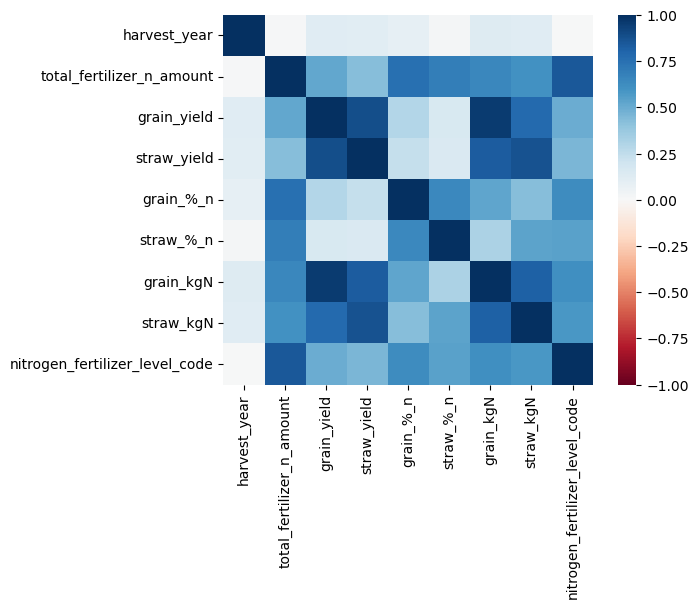

In [38]:
# Look at all the correlations in my dataset

%matplotlib inline

import seaborn as sns
corr = crop_data.corr() #gives us the linear correlation between all these features
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu") #plot the heatmap

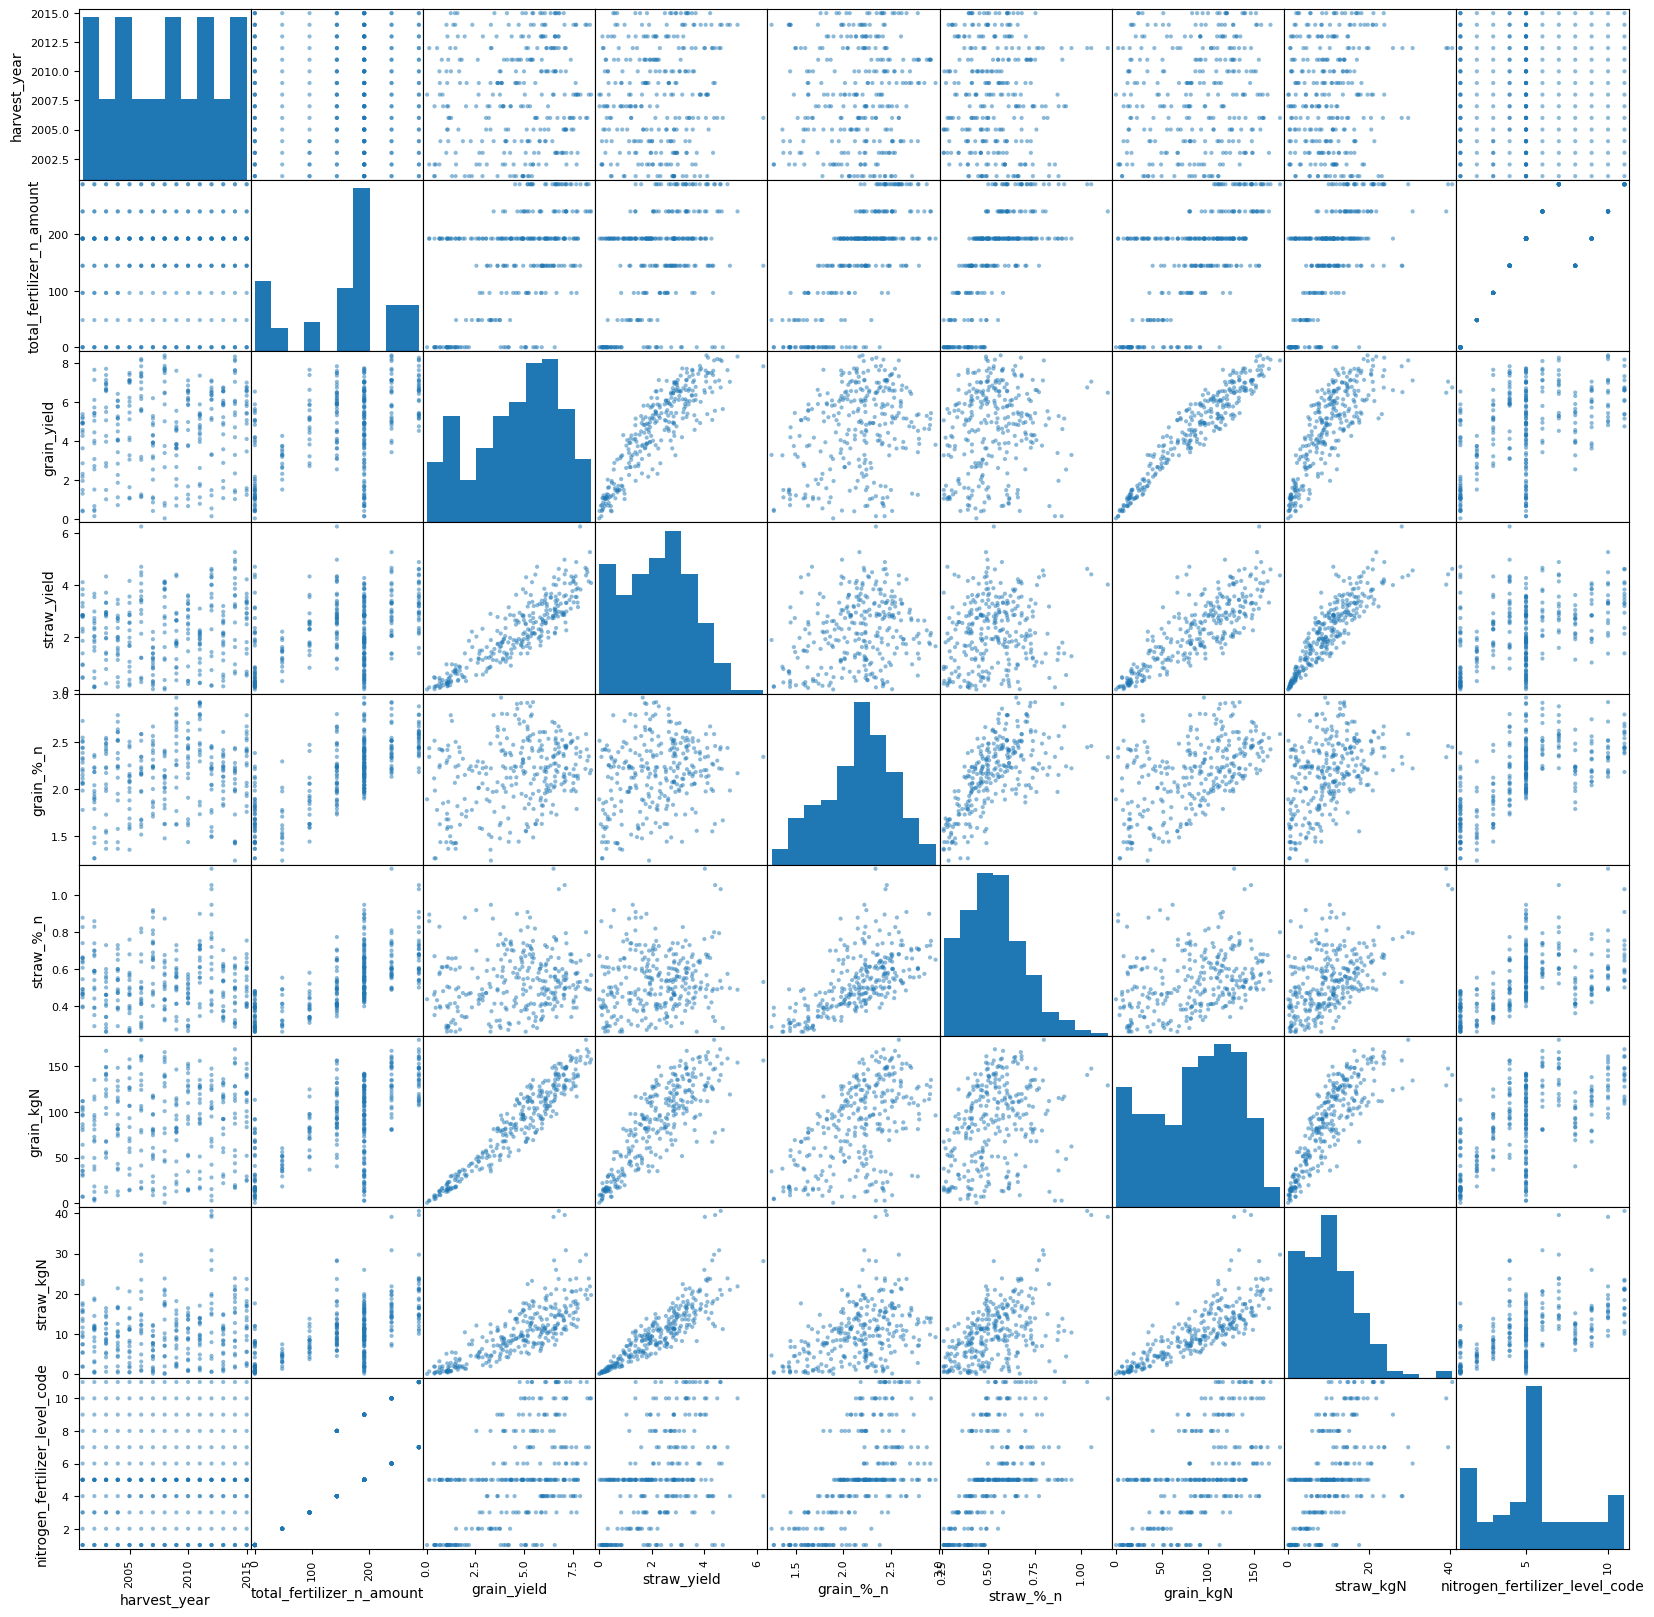

In [20]:
# Now create a multi plot scatter matrix to have a look at the relationships

from pandas.plotting import scatter_matrix

a = scatter_matrix(crop_data, figsize=(20, 20)) #plot scatter matrix 

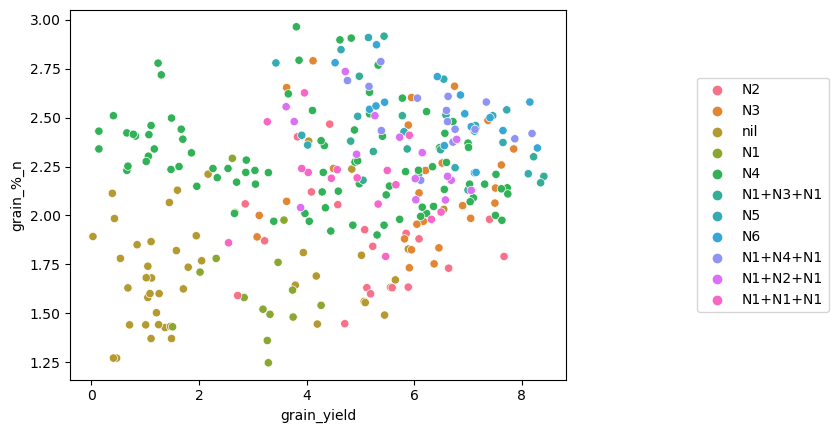

In [27]:
# blow up plot of grain_%_n and grain_yield as the two factors are not highly correlated and have quite well distributed data
import seaborn as sns

grainYieldVsGrainN=sns.scatterplot(x="grain_yield", y="grain_%_n", hue="n_factor_level", data=crop_data) #blow up scatterplot, with N factor level as colour for data points
grainYieldVsGrainN.legend(loc='center left',bbox_to_anchor=(1.25,0.5), ncol=1) #move the legend so it doesn't block the graph

This plot shows a relatively good spread of the data considering there are so many different N fertilizer levels. So I will take this graph forwards for K-Nearest Neighbours.

## Split into test and training
Split data into a subset of data to fit with a subset of data to test against, so we can see how good our model is later on.

In [23]:
from sklearn.model_selection import train_test_split 

train_crop_data, test_crop_data, train_crop_data['n_factor_level'], test_crop_data['n_factor_level']= train_test_split(crop_data, crop_data['n_factor_level'], random_state=42) #split data, keeping random state at 42 so I see the same results each run
test_crop_data #quickly look that everything seems to be ok

,harvest_year,fertilizer_code,n_factor_level,total_fertilizer_n_amount,p_factor_level,k_factor_level,mg_factor_level,cultivar,grain_yield,straw_yield,grain_%_n,straw_%_n,grain_kgN,straw_kgN,nitrogen_fertilizer_level_code
9,2010,FYM N3,N3,144,nil,nil,nil,Hereward,5.89,3.40,2.462,0.468,123.260,13.525,4.0
249,2010,N1+2+1PKMg,N1+N2+N1,192,P,K,Mg,Hereward,6.15,3.28,2.321,0.489,121.330,13.633,9.0
157,2008,N1+3+1(P)KMg,N1+N3+N1,240,(P),K,Mg,Hereward,8.41,4.08,2.200,0.567,157.267,19.664,10.0
209,2015,N5(P)KMg,N5,240,(P),K,Mg,Mulika,5.81,2.76,2.428,0.603,119.907,14.146,6.0
75,2001,N2(P)KMg,N2,96,(P),K,Mg,Hereward,2.86,2.33,2.059,0.464,50.054,9.190,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2011,FYM N3,N3,144,nil,nil,nil,Hereward,7.37,3.10,2.486,0.646,155.735,17.022,4.0
101,2012,N3(P)KMg,N3,144,(P),K,Mg,Hereward,6.37,3.67,1.752,0.473,94.862,14.755,4.0
37,2008,Nil,nil,0,nil,nil,nil,Hereward,0.03,0.01,1.892,0.436,0.482,0.037,1.0
16,2002,FYM,nil,0,nil,nil,nil,Hereward,5.45,2.74,1.490,0.290,69.024,6.754,1.0


## Begin K Nearest Neighbours
First up is optimisation of model by determining best number of neighbours to use. We will then follow this up by creating and running the model.


*Optimise number of neighbours*

In [28]:
#GridSeachCV will rerun the model training for every possible hyper-parameter that I pass it (in this case, 1 to 60). It will then choose the best value for me 
from pandas import DataFrame
from sklearn.model_selection  import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier()

parameters = {
    "n_neighbors" : range(1, 60),
}
clf = GridSearchCV(model, parameters).fit(train_crop_data[["grain_yield", "grain_%_n"]], train_crop_data['nitrogen_fertilizer_level_code'])

C:\Users\ec17981\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ec17981\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [29]:
# view results of best number of neighbours in a table
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]


,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
14,15,0.465116,0.056856,1
12,13,0.460354,0.064468,2
16,17,0.451274,0.072375,3
13,14,0.450831,0.055247,4
18,19,0.446512,0.062993,5


best number of neighbours according to table above and graph below is 15

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

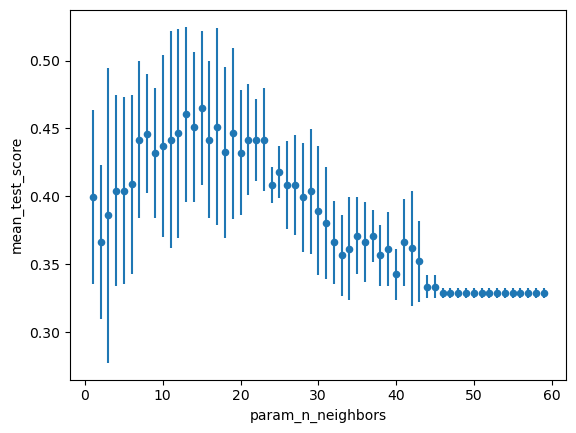

In [30]:
#view results of best number of neighbours in a graph
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

*Create the model*

In [32]:
model = KNeighborsClassifier(n_neighbors=15) #set number of neighbours to calculated best value
model.fit(train_crop_data[["grain_yield", "grain_%_n"]], train_crop_data['nitrogen_fertilizer_level_code'])


KNeighborsClassifier(n_neighbors=15)

In [33]:
# imported provided code from the course to plot our data

def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)


C:\Users\ec17981\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


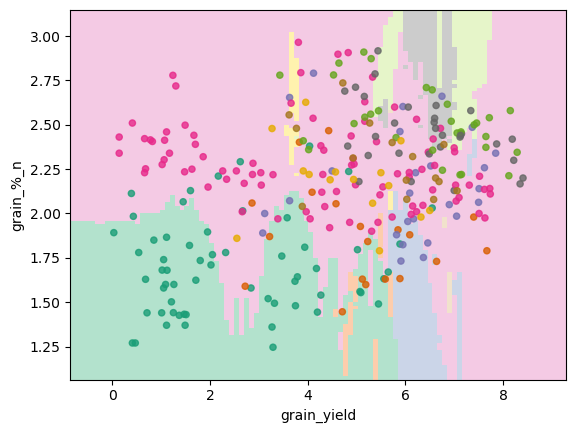

In [34]:
KNN = plot_knn(model, crop_data[["grain_yield", "grain_%_n"]], crop_data['nitrogen_fertilizer_level_code']) #plot the KNN model


In [36]:
model.score(crop_data[["grain_yield", "grain_%_n"]], crop_data['nitrogen_fertilizer_level_code']) #score the KNN model

C:\Users\ec17981\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.45614035087719296

This result of 0.46 (to 2 dp) means that we can predict what fertilizer type was used given the grain yield and harvested grain % Nitrogen to 46% accuracy. It's not the most accurate, but this model could make a good primary predictor for fertilizer type used.

There is no point in scaling the data for this analysis as Eigenvectors and Eigenvalues are calculated based on euclidean distance coordinate space. Thus assumes a change of 1 unit in one value is the same as a change of 1 unit in another value in the same geometric space. The scales in this data don't vary wildly, so there is no point in doing this.

